## Section A: Dataset Loading & Exploration

In [10]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the dataset using pandas and print the first 5 rows
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Print the shape and column names of the dataset.
print(data.shape)
print(data.columns)

(200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [4]:
# Check for missing values and describe how many nulls are in each column
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

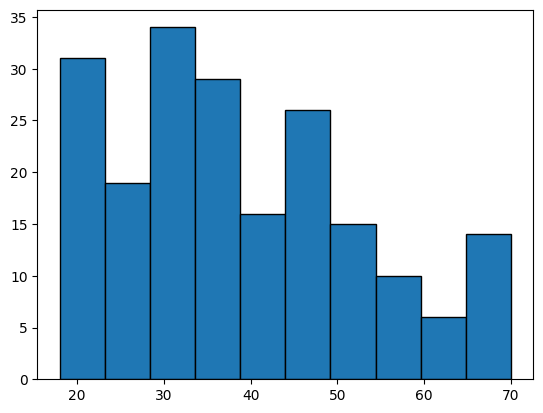

In [6]:
# Create a histogram of the Age column.
plt.hist(data['Age'], bins=10, edgecolor='black')

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

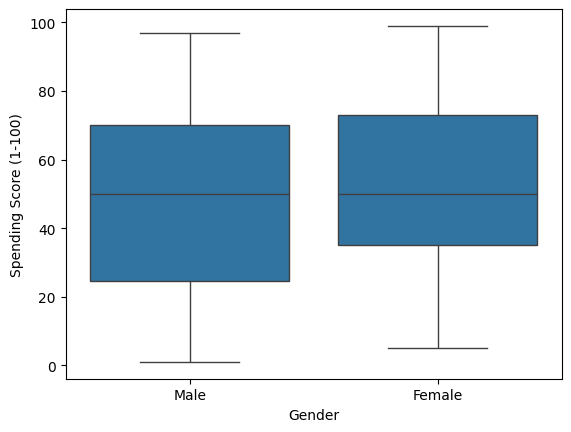

In [9]:
# Use seaborn to create a boxplot comparing Spending Score (1-100) by Gender.
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)

In [11]:
# Normalize the columns Annual Income (k$) and Spending Score (1-100) using MinMaxScaler.
scaler = MinMaxScaler()
data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

## Section B: KMeans Clustering

In [12]:
# Select the columns ['Annual Income (k$)', 'Spending Score (1-100)'] for clustering and assign to variable X.
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

Text(0, 0.5, 'WCSS')

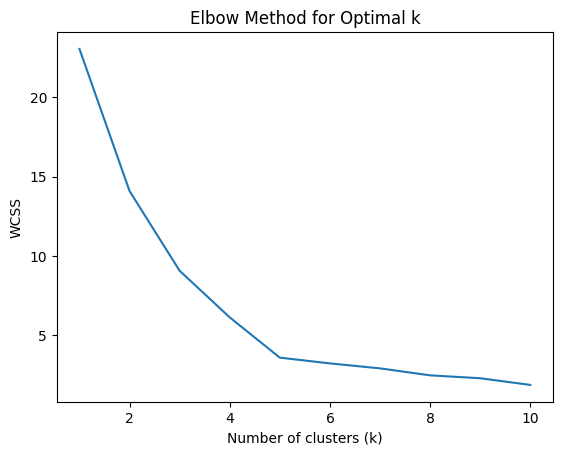

In [14]:
# Use the elbow method to determine the optimal number of clusters for KMeans. Plot the within-cluster sum of squares for k = 1 to 10.
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')


In [ ]:
# Based on your plot, choose an appropriate value for k. Initialize and fit a KMeans model.
k = 5  # Example value, adjust based on elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [17]:
# Add the predicted cluster labels as a new column in the DataFrame.
data['Cluster'] = kmeans.labels_
# Print the first 5 rows of the DataFrame with the new Cluster column.
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19            0.000000                0.387755   
1           2    Male   21            0.000000                0.816327   
2           3  Female   20            0.008197                0.051020   
3           4  Female   23            0.008197                0.775510   
4           5  Female   31            0.016393                0.397959   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


Text(0.5, 1.0, 'KMeans Clustering of Mall Customers')

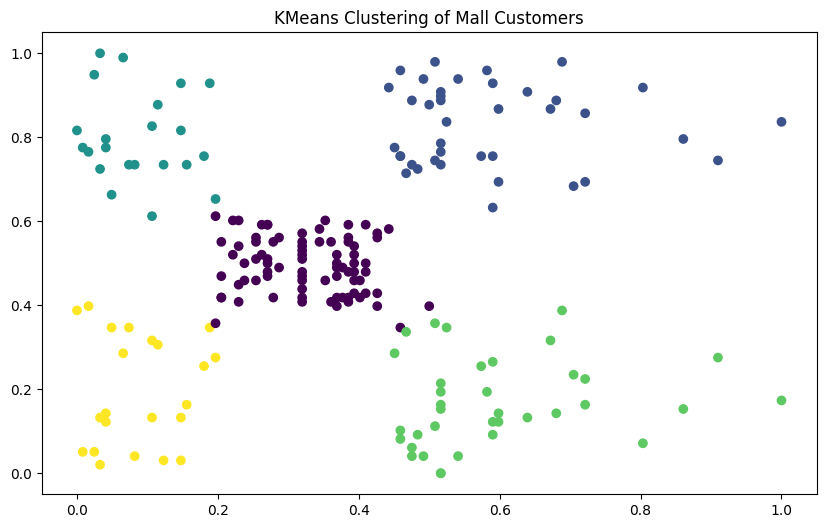

In [18]:
# Plot the KMeans clusters in 2D using plt.scatter(), coloring by cluster.
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering of Mall Customers')

In [20]:
# Print the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

Cluster centroids:
Cluster 0: [0.32695811 0.49533888]
Cluster 1: [0.58638083 0.82783883]
Cluster 2: [0.08792846 0.79962894]
Cluster 3: [0.59631148 0.16921769]
Cluster 4: [0.08792846 0.19619666]


In [21]:
# Calculate and print the number of data points in each cluster.
cluster_counts = data['Cluster'].value_counts()
print("Number of data points in each cluster:")
print(cluster_counts)

Number of data points in each cluster:
Cluster
0    81
1    39
3    36
4    22
2    22
Name: count, dtype: int64


In [22]:
# Which cluster has the highest average income? Write code to find out.
highest_income_cluster = data.groupby('Cluster')['Annual Income (k$)'].mean().idxmax()
highest_income_value = data.groupby('Cluster')['Annual Income (k$)'].mean().max()
print(f"Cluster with highest average income: {highest_income_cluster}, Average Income: {highest_income_value}")

Cluster with highest average income: 3, Average Income: 0.5963114754098361


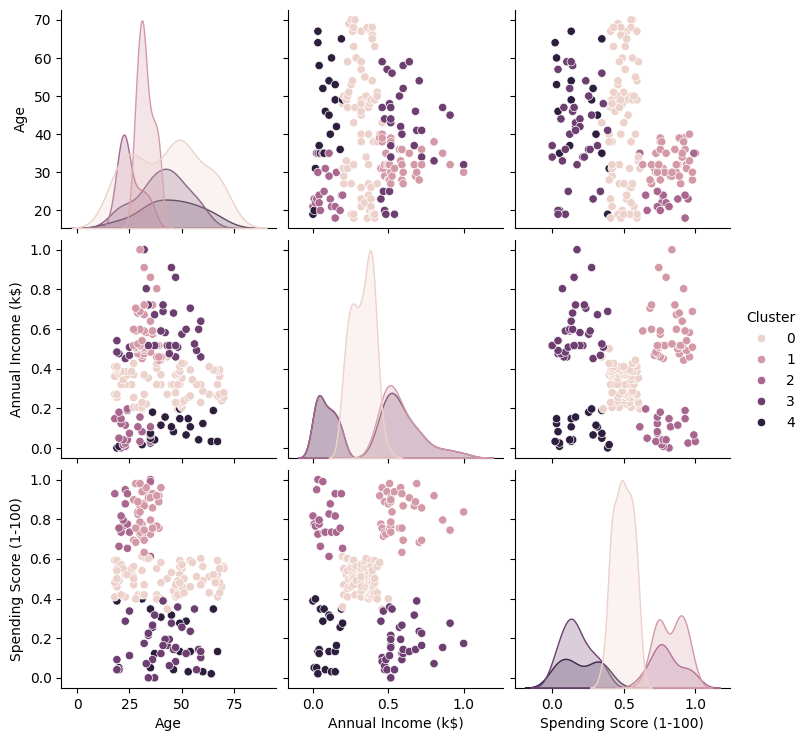

In [23]:
# Plot a seaborn.pairplot showing Age, Annual Income (k$), and Spending Score (1-100) colored by cluster.
sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

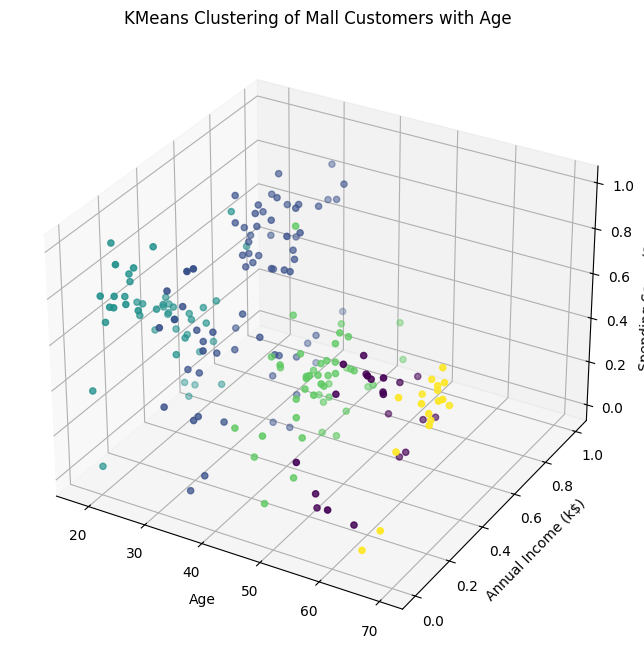

In [24]:
# Modify the KMeans model to include Age as well (i.e., use 3 features). Plot the new clusters.
X_with_age = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
kmeans_with_age = KMeans(n_clusters=k, random_state=42)
kmeans_with_age.fit(X_with_age)
# Add the new cluster labels to the DataFrame.
data['Cluster_with_Age'] = kmeans_with_age.labels_
# Plot the new clusters in 3D using mpl_toolkits.mplot3d.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_with_Age'], cmap='viridis', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('KMeans Clustering of Mall Customers with Age')
plt.show()

In [25]:
# What happens when you set k to a very large number (e.g., 15)? Fit the model and describe in comments
    # When k is set to a very large number, the KMeans algorithm will create many clusters, often leading to overfitting.
    # The clusters may not represent meaningful groupings in the data, and the centroids may be very close to each other.
k_large = 15
kmeans_large = KMeans(n_clusters=k_large, random_state=42)
kmeans_large.fit(X)
    # Add the predicted cluster labels for the large k to the DataFrame.
data['Cluster_Large_k'] = kmeans_large.labels_
    # Print the first 5 rows of the DataFrame with the new Cluster_Large_k column.
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19            0.000000                0.387755   
1           2    Male   21            0.000000                0.816327   
2           3  Female   20            0.008197                0.051020   
3           4  Female   23            0.008197                0.775510   
4           5  Female   31            0.016393                0.397959   

   Cluster  Cluster_with_Age  Cluster_Large_k  
0        4                 2                6  
1        2                 2                8  
2        4                 2                4  
3        2                 2                8  
4        4                 1                6  


Cluster centroids with Standard Scaling:
Cluster 0: [-0.20091257 -0.02645617]
Cluster 1: [0.99158305 1.23950275]
Cluster 2: [-1.32954532  1.13217788]
Cluster 3: [ 1.05500302 -1.28443907]
Cluster 4: [-1.30751869 -1.13696536]
Number of data points in each cluster with Standard Scaling:
Cluster_Standard
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


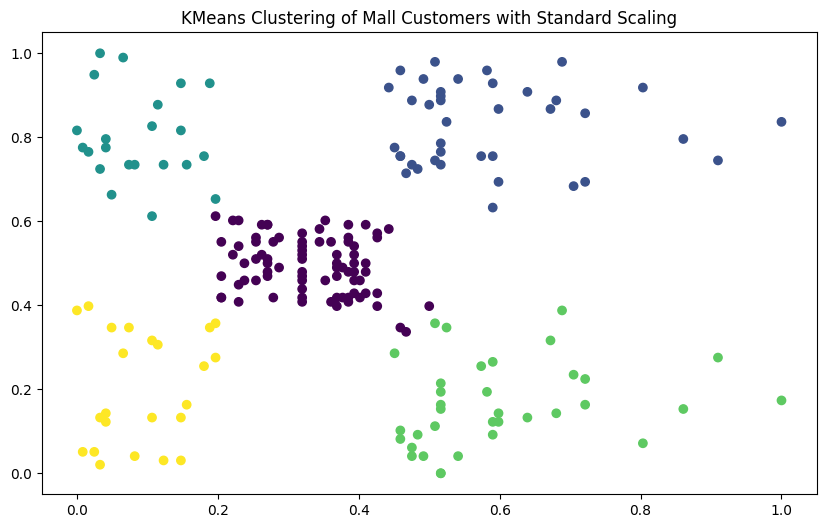

In [26]:
# Use StandardScaler instead of MinMaxScaler and re-run the clustering. Compare the results.
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
kmeans_standard = KMeans(n_clusters=k, random_state=42)
kmeans_standard.fit(X_standard)
# Add the predicted cluster labels for the standard scaled data to the DataFrame.
data['Cluster_Standard'] = kmeans_standard.labels_
# Plot the clusters using the standard scaled data.
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_Standard'], cmap='viridis', marker='o')
plt.title('KMeans Clustering of Mall Customers with Standard Scaling')
# Print the coordinates of the cluster centroids for the standard scaled data.
centroids_standard = kmeans_standard.cluster_centers_
print("Cluster centroids with Standard Scaling:")
for i, centroid in enumerate(centroids_standard):
    print(f"Cluster {i}: {centroid}")
# Calculate and print the number of data points in each cluster for the standard scaled data.
cluster_counts_standard = data['Cluster_Standard'].value_counts()
print("Number of data points in each cluster with Standard Scaling:")
print(cluster_counts_standard)
# Compare the results of the clustering with MinMaxScaler and StandardScaler.
# The clusters may differ in terms of their shapes and sizes, as StandardScaler standardizes the data to have a mean of 0 and a standard deviation of 1, while MinMaxScaler scales the data to a fixed range (0 to 1).
plt.show()

##  Section C: Hierarchical Clustering

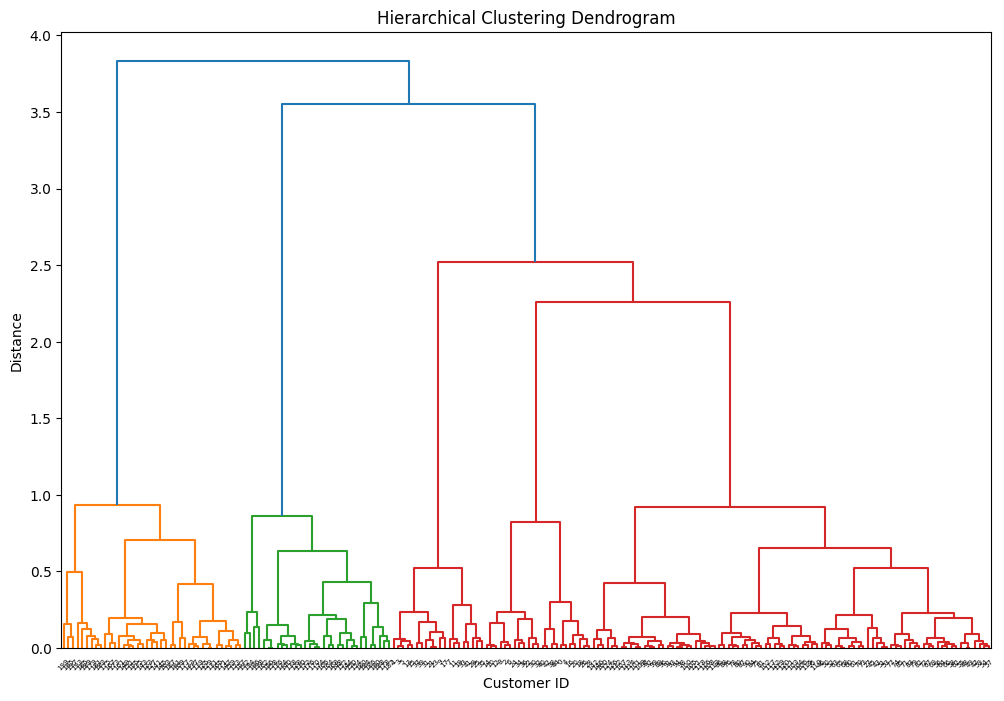

In [30]:
# Use scipy.cluster.hierarchy to generate a linkage matrix using 'ward' linkage.
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(X, method='ward')
# Plot a dendrogram to visualize the hierarchical clustering.
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data.index.astype(str), leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)
plt.ylabel('Distance')
plt.show()

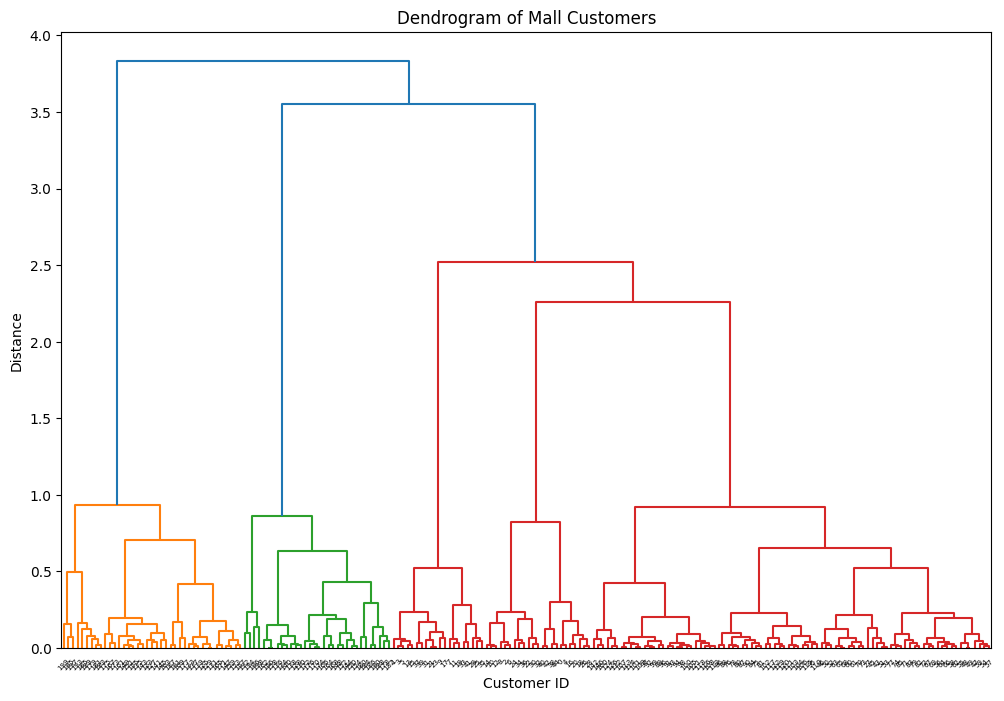

In [31]:
# Plot a dendrogram of the data using the linkage matrix.
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data.index.astype(str), leaf_rotation=90)
plt.title('Dendrogram of Mall Customers')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)
plt.ylabel('Distance')
plt.show()

In [32]:
# From the dendrogram, determine how many clusters would make sense (cutting at a good height).
    # By visually inspecting the dendrogram, a good cut-off appears to be at a height where there are large vertical jumps before clusters merge.
    # Typically, this is around 4 or 5 clusters for this dataset.
n_clusters_hierarchical = 5
print(f"Based on the dendrogram, {n_clusters_hierarchical} clusters would make sense.")

Based on the dendrogram, 5 clusters would make sense.


In [33]:
# Use AgglomerativeClustering from sklearn with the chosen number of clusters and print the labels.
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=n_clusters_hierarchical)
agglo.fit(X)
# Add the predicted cluster labels to the DataFrame.
data['Cluster_Hierarchical'] = agglo.labels_
# Print the first 5 rows of the DataFrame with the new Cluster_Hierarchical column
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19            0.000000                0.387755   
1           2    Male   21            0.000000                0.816327   
2           3  Female   20            0.008197                0.051020   
3           4  Female   23            0.008197                0.775510   
4           5  Female   31            0.016393                0.397959   

   Cluster  Cluster_with_Age  Cluster_Large_k  Cluster_Standard  \
0        4                 2                6                 4   
1        2                 2                8                 2   
2        4                 2                4                 4   
3        2                 2                8                 2   
4        4                 1                6                 4   

   Cluster_Hierarchical  
0                     4  
1                     3  
2                     4  
3                     3  
4                     

In [ ]:
# Add the labels as a column to the dataset and compare the results with KMeans labels using pd.crosstab().
# Add the AgglomerativeClustering labels as a column if not already present
data['Cluster_Hierarchical'] = agglo.labels_

# Compare the results with KMeans labels using pd.crosstab()
crosstab_kmeans = pd.crosstab(data['Cluster'], data['Cluster_Hierarchical'])
print(crosstab_kmeans)


Cluster_Hierarchical   0   1   2   3   4
Cluster                                 
0                      0  80   0   0   1
1                     39   0   0   0   0
2                      0   2   0  20   0
3                      0   4  32   0   0
4                      0   0   0   0  22


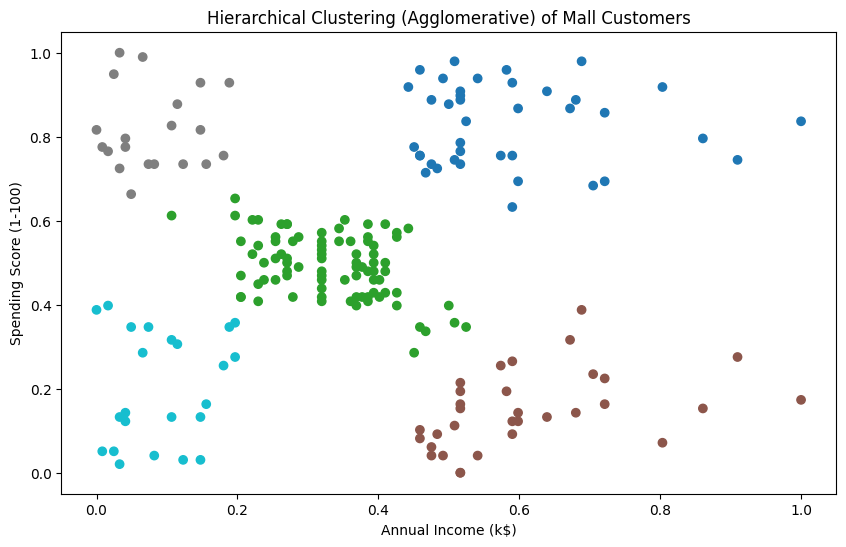

In [36]:
# Create a 2D scatter plot of the hierarchical clusters using the same two features.
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_Hierarchical'], cmap='tab10', marker='o')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering (Agglomerative) of Mall Customers')
plt.show()

## Section D: Interpretation + Strategy

In [39]:
# Write a function that takes a cluster label and prints summary statistics for that group (mean income, age, spending score).
def summarize_cluster(cluster_label):
    cluster_data = data[data['Cluster_Hierarchical'] == cluster_label]
    mean_income = cluster_data['Annual Income (k$)'].mean()
    mean_age = cluster_data['Age'].mean()
    mean_spending_score = cluster_data['Spending Score (1-100)'].mean()
    
    print(f"Cluster {cluster_label} Summary:")
    print(f"Mean Annual Income (k$): {mean_income:.2f}")
    print(f"Mean Age: {mean_age:.2f}")
    print(f"Mean Spending Score (1-100): {mean_spending_score:.2f}")
for label in data['Cluster_Hierarchical'].unique():
    summarize_cluster(label)

Cluster 4 Summary:
Mean Annual Income (k$): 0.09
Mean Age: 45.22
Mean Spending Score (1-100): 0.20
Cluster 3 Summary:
Mean Annual Income (k$): 0.08
Mean Age: 24.85
Mean Spending Score (1-100): 0.82
Cluster 1 Summary:
Mean Annual Income (k$): 0.33
Mean Age: 42.40
Mean Spending Score (1-100): 0.49
Cluster 0 Summary:
Mean Annual Income (k$): 0.59
Mean Age: 32.69
Mean Spending Score (1-100): 0.83
Cluster 2 Summary:
Mean Annual Income (k$): 0.61
Mean Age: 41.00
Mean Spending Score (1-100): 0.15


In [40]:
# Identify the cluster that represents high income but low spending customers.
high_income_low_spending_cluster = data[(data['Annual Income (k$)'] > 0.8) & (data['Spending Score (1-100)'] < 0.2)]
if not high_income_low_spending_cluster.empty:
    print("High income but low spending customers found in the following cluster(s):")
    print(high_income_low_spending_cluster['Cluster_Hierarchical'].unique())

High income but low spending customers found in the following cluster(s):
[2]


In [ ]:
# Suggest a marketing strategy for this group. Write it as a comment.
# Marketing Strategy:
# For the high income but low spending customers, a targeted marketing strategy could involve:
# 1. Offering exclusive promotions or loyalty programs to encourage higher spending.
# 2. Personalized marketing campaigns that highlight premium products or services.
# 3. Conducting surveys to understand their preferences and tailor offerings accordingly.

In [ ]:
# Identify the cluster that represents low income but high spending customers.
low_income_high_spending_cluster = data[(data['Annual Income (k$)'] < 0.2) & (data['Spending Score (1-100)'] > 0.8)]
if not low_income_high_spending_cluster.empty:
    print("Low income but high spending customers found in the following cluster(s):")
    print(low_income_high_spending_cluster['Cluster_Hierarchical'].unique())    

Low income but high spending customers found in the following cluster(s):
[3]


In [ ]:
# Suggest a retention strategy for this group. Write it as a comment.
# Retention Strategy:
# For the low income but high spending customers, a retention strategy could include:
# 1. Offering discounts or special deals on products they frequently purchase.
# 2. Creating a loyalty program that rewards frequent purchases.
# 3. Engaging with them through personalized communication to build a strong relationship.

In [42]:
# Export the clustered dataset to a new CSV file using df.to_csv().
data.to_csv('Mall_Customers_Clustered.csv', index=False)
print("Clustered dataset exported to 'Mall_Customers_Clustered.csv'.")


Clustered dataset exported to 'Mall_Customers_Clustered.csv'.
